# Extracting easting/northing tuples from SA2 csv file

In [230]:
f=open("./statsnzstatistical-area-2-2020-generalised-CSV/statistical-area-2-2020-generalised.csv")
lines=f.readlines()
f.close()

In [161]:
import pandas as pd

rows_list = []
for k in range(len(lines)):
    if lines[k].startswith('"MULTIPOLYGON ((('):
        cut=lines[k][(len('"MULTIPOLYGON (((')):lines[k].find(')))')] #cuts out the multipolygon
        cut=cut.replace(')',"")
        cut=cut.replace('(',"")
        tups=cut.split(',')
        for i in range(len(tups)):
            seps=tups[i].split(' ')
            dict1 = {}
            dict1.update({"easting":seps[0],"northing":seps[1]}) 
            rows_list.append(dict1)

df = pd.DataFrame(rows_list) 
df.drop_duplicates() #This is not successful in removing the duplicates... I find them later when I create another dictionary
#df.to_csv("NZTMCoords.csv", index=False,header=False)#for online calculator
df.to_csv("inputFile.csv")#function

# Will this work?

In [179]:
#Read in the converted coordinates
coords=pd.read_csv("outputFile.csv")
coords=coords.drop('site_id',axis='columns')
#coords.head()

,easting,northing,longitude,latitude
0,1.567022e+06,6.185741e+06,172.640910,-34.469365
1,1.567016e+06,6.185699e+06,172.640842,-34.469749
2,1.567008e+06,6.185676e+06,172.640750,-34.469956
3,1.567002e+06,6.185667e+06,172.640690,-34.470037
4,1.566988e+06,6.185652e+06,172.640536,-34.470170


In [219]:
#Create a dictionary where the easting and northing is the key and long and lat the value
dictCoords = {}
for i in range(len(coords)):
    E_N=str(coords.iloc[i,0])+" "+str(coords.iloc[i,1])
    Long_Lat=str(coords.iloc[i,2])+" "+str(coords.iloc[i,3])
    dictCoords.update({E_N:Long_Lat}) 

len(dictCoords)

1283355

In [231]:
#create a dictionary of the tups in the line
print(len(lines))
for k in range(len(lines)): 
    print(k)
    newLine=lines[k]
    if lines[k].startswith('"MULTIPOLYGON ((('):
        cut=lines[k][(len('"MULTIPOLYGON (((')):lines[k].find(')))')] #cuts out the multipolygon
        cut=cut.replace(')',"")
        cut=cut.replace('(',"")
        tups=cut.split(',') 
        for i in range(len(tups)):
            newLine=newLine.replace(tups[i],dictCoords[tups[i]])
        lines[k]=newLine
    

2256
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143


In [313]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely import wkt
import imageio
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

rows_list = []
for k in range(len(lines)):
    if lines[k].startswith('"MULTIPOLYGON ((('):
        geom=lines[k][1:(lines[k].rfind('"')+1)] #cuts out the geometry
        SA2_index, SA2_name, SA2_ascii, Land_area, Area, Length=lines[k][lines[k].rfind('"')+2:].split(",")
        Length=Length[:Length.find("n")]
        dict1 = {}
        dict1.update({'SA2_index': SA2_index,'SA2_name':SA2_name,'SA2_ascii':SA2_ascii,'Land_area':Land_area,'Area':Area,'Length':Length,'geometry': geom})
        rows_list.append(dict1)

df = pd.DataFrame(rows_list)

In [314]:
#remomving Oceanic regions
oceanicList=[]
for i in range(len(df)):
    if "Oceanic" in df.iloc[i,1]:
        oceanicList.append(i)

df=df.drop(oceanicList)

In [315]:
df['geometry'] = gpd.GeoSeries.from_wkt(df['geometry'])
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [351]:
def nztm_to_lat_long(input_filename, output_filename):
    import math
    infile = open(input_filename)
    lines = infile.readlines()
    infile.close()
        
    outfile = open(output_filename, 'w')
    outfile.write("site_id, easting, northing, longitude, latitude\n")
        
    for line in lines[1:]: #skip header row
        site_id, nztm_e, nztm_n = line.split(',')
        
            
        #Common variables for NZTM2000
        a = 6378137;
        f = 1 / 298.257222101;
        phizero = 0;
        lambdazero = 173;
        Nzero = 10000000;
        Ezero = 1600000;
        kzero = 0.9996;   
        
            
        #input Northing(Y); Easting(X) variables
        E  = float(nztm_e);#neither int(float(nztm_e)) or this produces the right decimals
        N  = float(nztm_n);
            
        #Calculation: From NZTM to lat/Long
        b = a * (1 - f);
        esq = 2 * f - f ** 2;
        Z0 = 1 - esq / 4 - 3 * (esq ** 2) / 64 - 5 * (esq ** 3) / 256;
        A2 = 0.375 * (esq + esq ** 2 / 4 + 15 * (esq ** 3) / 128);
        A4 = 15 * ((esq ** 2) + 3 * (esq ** 3) / 4) / 256;
        A6 = 35 * (esq ** 3) / 3072;
            
        Nprime = N - Nzero;
        mprime = Nprime / kzero;
        smn = (a - b) / (a + b);
        G = a * (1 - smn) * (1 - (smn ** 2)) * (1 + 9 * (smn ** 2) / 4 + 225 * (smn ** 4) / 64) * math.pi/ 180.0;
        sigma = mprime * math.pi / (180 * G);
        phiprime = sigma + (3 * smn / 2 - 27 * (smn ** 3) / 32) * math.sin(2 * sigma) + (21 * (smn ** 2) / 16 - 55 * (smn ** 4) / 32) * math.sin(4 * sigma) + (151 * (smn ** 3) / 96) * math.sin(6 * sigma) + (1097 * (smn ** 4) / 512) *math.sin(8 * sigma);
        rhoprime = a * (1 - esq) / ((1 - esq * ((math.sin(phiprime)) ** 2)) ** 1.5);
        upsilonprime = a / math.sqrt(1 - esq * ((math.sin(phiprime)) ** 2));
            
        psiprime = upsilonprime / rhoprime;
        tprime = math.tan(phiprime);
        Eprime = E - Ezero;
        chi = Eprime / (kzero * upsilonprime);
        term_1 = tprime * Eprime * chi / (kzero * rhoprime * 2);
        term_2 = term_1 * (chi ** 2) / 12 * (-4 * (psiprime ** 2) + 9 * psiprime * (1 - (tprime ** 2)) + 12 * (tprime ** 2));
        term_3 = tprime * Eprime * (chi ** 5) / (kzero * rhoprime * 720) * (8 * (psiprime ** 4) * (11 - 24 * (tprime ** 2)) - 12 * (psiprime ** 3) * (21 - 71 * (tprime ** 2)) + 15 * (psiprime ** 2) * (15 - 98 * (tprime ** 2) + 15 * (tprime ** 4)) + 180 * psiprime * (5 * (tprime ** 2) - 3 * (tprime ** 4)) + 360 * (tprime ** 4));
        term_4 = tprime * Eprime * (chi ** 7) / (kzero * rhoprime * 40320) * (1385 + 3633 * (tprime ** 2) + 4095 * (tprime ** 4) + 1575 * (tprime ** 6));
        term1 = chi * (1 / math.cos(phiprime));
        term2 = (chi ** 3) * (1 / math.cos(phiprime)) / 6 * (psiprime + 2 * (tprime ** 2));
        term3 = (chi ** 5) * (1 / math.cos(phiprime)) / 120 * (-4 * (psiprime ** 3) * (1 - 6 * (tprime ** 2)) + (psiprime ** 2) * (9 - 68 * (tprime ** 2)) + 72 * psiprime * (tprime ** 2) + 24 * (tprime ** 4));
        term4 = (chi ** 7) * (1 / math.cos(phiprime)) / 5040 * (61 + 662 * (tprime ** 2) + 1320 * (tprime ** 4) + 720 * (tprime ** 6));        
        
        latitude = (phiprime - term_1 + term_2 - term_3 + term_4) * 180 / math.pi;
        longitude = lambdazero + 180 / math.pi * (term1 - term2 + term3 - term4);  
        outfile.write("{},{},{},{},{}\n".format(site_id, E, N, longitude, latitude))
    outfile.close()

#nztm_to_lat_long('inputFile.csv', 'outputFile.csv')

In [436]:
#KDE plot
#It seems like you pass a file of observations, so I need to decompose my geoUnits per area
# And I'll use the centroids

#Read in the complete set
groupA=pd.read_csv("../CompleteSet_GroupA.csv")
groupA=groupA.drop("Unnamed: 0",axis=1)

#Strip all leading whitespace in Area column
groupA['Area'] = groupA['Area'].apply(lambda x: x.strip())

#Filter for 2020
groupA_2020=groupA[groupA.Year==2020]
groupA_2020=groupA_2020[groupA_2020.ParentArea!='NewZealand']
groupA_2020=groupA_2020[groupA_2020.ParentArea!='TOTAL']


#Read in centroids and add to groupA_2020
centroids=pd.read_csv("./statsnzstatistical-area-2-2020-centroid-true-CSV/statistical-area-2-2020-centroid-true.csv")



#THIS CODE IS SO MUCH SHORTER BUT FOR SOME REASON IT UPSETS THE PLOTTING - No idea why
#for k in range(len(centroids)):
#    E_N=centroids.iloc[k,0][(len('POINT (')):centroids.iloc[k,0].find(')')] 
#    lon_lat=str(centroids.iloc[k,7])+" "+str(centroids.iloc[k,6])  
#    centroids.iloc[k,0]=centroids.iloc[k,0].replace(E_N,lon_lat)



wkts=centroids['WKT']
rowsList=[]
for k in range(len(wkts)):
    cut=wkts[k][(len('POINT (')):wkts[k].find(')')] 
    seps=cut.split(' ')
    dict1 = {}
    dict1.update({"easting":seps[0],"northing":seps[1]}) 
    rowsList.append(dict1)

df_centroidMercator = pd.DataFrame(rowsList) 
df_centroidMercator.to_csv("inputFileCentroids.csv")#function
nztm_to_lat_long('inputFileCentroids.csv', 'outputFileCentroids.csv')


In [437]:
#Read in the converted coordinates
centroidsCoords=pd.read_csv("outputFileCentroids.csv")
centroidsCoords=centroidsCoords.drop('site_id',axis='columns')

#Substitute back
dictCoords = {}
for i in range(len(centroidsCoords)):
    E_N=str(centroidsCoords.iloc[i,0])+" "+str(centroidsCoords.iloc[i,1])
    Long_Lat=str(centroidsCoords.iloc[i,2])+" "+str(centroidsCoords.iloc[i,3])
    dictCoords.update({E_N:Long_Lat}) 

for i in range(len(centroids)): 
    newString=centroids.iloc[i,0]
    cut=newString[(len('POINT (')):newString.find(')')] 
    newString=newString.replace(cut,dictCoords[cut])
    centroids.iloc[i,0]=newString

#convert to Geopandas
centroids['geometry'] = gpd.GeoSeries.from_wkt(centroids['WKT'])
gdf_centroid = gpd.GeoDataFrame(centroids, geometry='geometry')

In [488]:
# Create GeogUnits dataset
import math
rowsList=[]
for i in range(len(groupA_2020)):
    #find the centroid
    #geom=centroids.loc[centroids['SA22020_V1_00_NAME_ASCII']==groupA_2020.iloc[i,0],0] # I HAVE NO IDEA WHY THIS DOESN"T WORK HERE
    for t in range(len(centroids)):
        if groupA_2020.iloc[i,0] == centroids.iloc[t,3]:
            geom=centroids.iloc[t,0]
            break
    if not(math.isnan(groupA_2020.iloc[i,1])):
        for p in range(int(groupA_2020.iloc[i,1])):
            dict1 = {}
            dict1.update({"Area":groupA_2020.iloc[i,0],"geometry":geom}) 
            rowsList.append(dict1)
df_geogUnits = pd.DataFrame(rowsList)         

df_geogUnits.shape

(600729, 2)

In [492]:
df_geogUnits['geometry'] = gpd.GeoSeries.from_wkt(df_geogUnits['geometry'])
gdf_geogUnits = gpd.GeoDataFrame(df_geogUnits, geometry='geometry')

<class 'pandas.core.frame.DataFrame'>
Area          object
geometry    geometry
dtype: object


/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

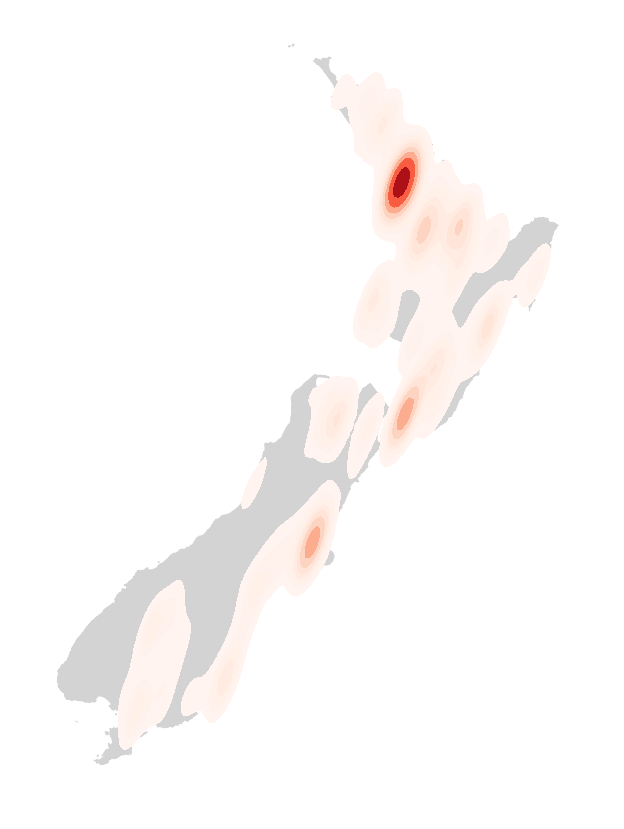

In [496]:
ax=gplt.polyplot(
    gdf, 
    edgecolor="lightgray",
    facecolor="lightgray",
    figsize=(20, 15),
    projection=gcrs.WebMercator())

gplt.kdeplot(gdf_geogUnits, cmap="Reds", shade=True, ax=ax)

#gplt.pointplot(gdf_centroid,ax=ax)


# Auckland blowout